In [49]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/michiomorizono/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Format What flavors denote
e.x. red: \[min attraction radius, max attraction radius, max/min attraction magnitude,sign (1 or -1)\]
- from 0 to min attraction radius, positive force (repulsion)  modeled by const\*(x-min_radius)\*\*2 
- from min to max attraction radius, force modeled by absolute value function -sign*|2*max_mag/(min+max)(x-(min+max)/2)-max_mag| 
- beyond max, the force is 0

In [36]:
global flavors
flavors = {"red": [1,2,3,1],"blue": [0.5,1.5,4,-1], "green": [0.75,1.75,2,1], "yellow": [1,3,0.5,-1]}

In [37]:
class Particle:
    def __init__(self,x,y,flavor, mass,v):
        self.x = x
        self.y = y
        self.flavor = flavor
        self.mass = mass
        self.v = v
    def distance(self, x, y):
        return math.sqrt((self.x-x)**2 + (self.y-y)**2)
    def getForce(self, particle):
        
        dist = self.distance(particle.x, particle.y)
        minrad = flavors[particle.flavor][0]
        maxrad = flavors[particle.flavor][1]
        maxmag = flavors[particle.flavor][2]
        sign = flavors[particle.flavor][3]
        try:
            angle = math.atan((self.y-particle.y)/(self.x-particle.x))
        except:
            angle = 1.57079632679
        
        if dist < minrad:
            force = 10*(dist-minrad)**2
        elif dist > minrad and dist < maxrad:
            force = -1*sign*abs(2*maxmag/(minrad+maxrad)*(dist-(minrad+maxrad)/2)-maxmag)
        else:
            force = 0
        
        return [force, angle]

Testing if force calculations work

In [78]:
particle1 = Particle(0,0,"red", 1,0)
particle2 = Particle(0,1.2,"blue", 1,0)
particle3 = Particle(1,0,"green",1,0)
print(particle1.getForce(particle2))
print(particle2.getForce(particle1))

[3.2, 1.57079632679]
[-3.6, 1.57079632679]


Use kinematic equations to move particles around:
- x += v\*cos(theta)t+1/2a\*cos(theta)\*t^2
- y += v\*sin(theta)t+1/2a\*sin(theta)\*t^2
- v += a\*t

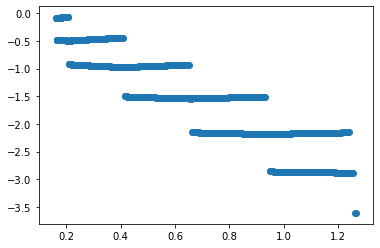

In [80]:
universe = [particle1,particle2,particle3]
step = 0
dt = 0.001
x_coords = []
y_coords = []
while step<1000:
    x_coords.append(universe[0].x*500)
    y_coords.append(universe[0].y*500)
    for i in range(len(universe)):
        net_magnitude = 0
        net_direction = 0
        for j in range(len(universe)):
            if i==j:
                pass
            else:
                force = universe[i].getForce(universe[j])
                net_magnitude+=force[0]
                net_direction+=force[1]
        universe[i].x+=universe[i].v*math.cos(net_direction)*dt+1/2*net_magnitude*math.cos(net_direction)/universe[i].mass*(dt**2)
        universe[i].y+=universe[i].v*math.sin(net_direction)*dt+1/2*net_magnitude*math.sin(net_direction)/universe[i].mass*(dt**2)
        universe[i].v+=net_magnitude*dt
    
    step+=1
plt.scatter(x_coords, y_coords)